<a href="https://colab.research.google.com/github/kittimaxz/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### วิเคราะห์ข้อมูล nndb_flat.csv และ Pizza.csv ด้วยความรู้ที่เรียนมาในบทที่ 1-3

**ส่งก่อน 10.30 น. วันจันทร์ที่ 22 มีนาคม 2564**

***commit ว่า Exam01***

### การวิเคราะห์ข้อมูลจาก nndb_flat.csv

In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv('nndb_flat.csv')
data1

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**ตรวจสอบขนาดของข้อมูล เพื่อดูว่ามี Data กี่ตัว และ มีกี่ Dimensions**

In [3]:
data1.shape

(8618, 45)

**Plot Scatter Matrix เพื่อดูการกระจายของ Data ในมุมมองต่าง ๆ**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d46a06910>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

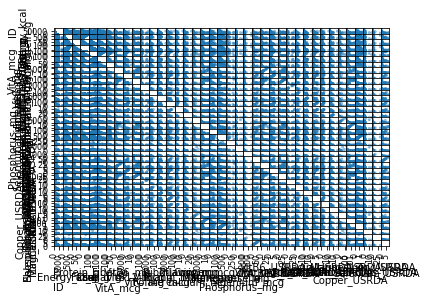

In [4]:
pd.plotting.scatter_matrix(data1)

**เนื่องจาก Data นั้นมี Dimension มากเกินไป ดังนั้นจึงต้องทดสอบดูว่า Column ใดบ้างที่ให้ข้อมูลซ้ำกับ Column อื่น จากนั้นทำการลบมันออก**

**โดยเลือกเฉพาะข้อมูลที่เป็นตัวเลขเท่านั้นมาทำต่อ**

In [5]:
newdata1=data1.iloc[:,7:]
newdata1.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


**ตรวจสอบเพื่อหาว่าระหว่าง Columns นั้นมี Correlation กันมากน้อยเพียงใด ด้วย Numpy**

In [6]:
import numpy as np

In [7]:
corr=np.corrcoef(newdata1.to_numpy().T)

In [8]:
corr.shape

(38, 38)

In [9]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [10]:
print(corr)

[[1.         0.11030203 0.80679472 ... 0.19518065 0.05667274 0.11276635]
 [0.11030203 1.         0.05471538 ... 0.44460761 0.37836917 0.41631538]
 [0.80679472 0.05471538 1.         ... 0.06608644 0.03755914 0.02826352]
 ...
 [0.19518065 0.44460761 0.06608644 ... 1.         0.22368557 0.26657694]
 [0.05667274 0.37836917 0.03755914 ... 0.22368557 1.         0.20529859]
 [0.11276635 0.41631538 0.02826352 ... 0.26657694 0.20529859 1.        ]]


**ทำการวนลูปเพื่อหาค่า Correlation ที่ซ้ำกัน**

In [11]:
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (i !=j) and (corr[i,j]==1.): 
      print(f' row = {i} column = {j} corrcoef = {corr[i,j]}')
###จากการทดสอบจะเห็นได้ว่ามีข้อมูลที่มีค่า Correlation ซ้ำกันอยู่

 row = 10 column = 27 corrcoef = 1.0
 row = 12 column = 29 corrcoef = 1.0
 row = 13 column = 30 corrcoef = 1.0
 row = 14 column = 31 corrcoef = 1.0
 row = 18 column = 34 corrcoef = 1.0
 row = 20 column = 35 corrcoef = 1.0
 row = 22 column = 37 corrcoef = 1.0
 row = 27 column = 10 corrcoef = 1.0
 row = 29 column = 12 corrcoef = 1.0
 row = 30 column = 13 corrcoef = 1.0
 row = 31 column = 14 corrcoef = 1.0
 row = 34 column = 18 corrcoef = 1.0
 row = 35 column = 20 corrcoef = 1.0
 row = 37 column = 22 corrcoef = 1.0


In [12]:
newdata1.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


In [13]:
from matplotlib import pyplot as plt

**Data ที่มี Correlation เป็น 1**

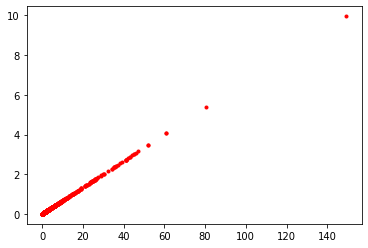

In [14]:
plt.plot(newdata1.iloc[:,10],newdata1.iloc[:,27],'r.')

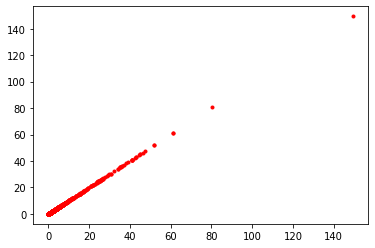

In [15]:
plt.plot(newdata1.iloc[:,10],newdata1.iloc[:,10],'r.')

**Data ที่มี Correlation เป็นค่าอื่น ๆ**

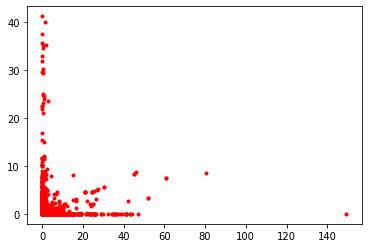

In [16]:
plt.plot(newdata1.iloc[:,10],newdata1.iloc[:,25],'r.')

**ลบ Column ที่ซ้ำกัน**

In [17]:
newdata1.columns.str.contains('_USRDA') ### ดูว่าชื่อไหนมี "_USRDA" บ้างโดยถ้ามีจะขึ้นว่า "True"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [18]:
newdata1.columns[newdata1.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [19]:
newdata1.drop(newdata1.columns[newdata1.columns.str.contains('_USRDA')].values,axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


**ลบ Column ที่มีค่า Correlation เป็น 1 เมื่อเทียบกับ Column อื่น**

In [20]:
newdata1_dropped=newdata1.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'],axis=1)
newdata1_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [21]:
data1_dropped=data1.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'],axis=1)
data1_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


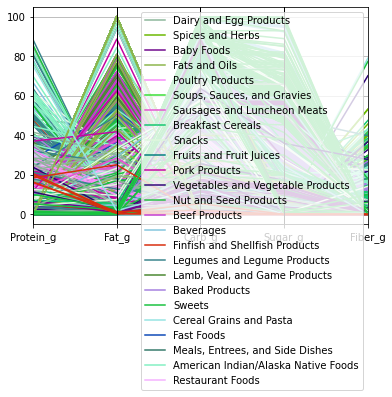

In [22]:
pd.plotting.parallel_coordinates(data1_dropped,'FoodGroup' ,cols=['Protein_g','Fat_g','Carb_g','Sugar_g','Fiber_g'])

**ทำ PCA เพื่อลดจำนวน Dimension**

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca=PCA(n_components=2)

In [25]:
new_pca=pca.fit_transform(newdata1_dropped.to_numpy())

In [26]:
new_pca.shape

(8618, 2)

In [27]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

**ดูว่ามี Food Group อะไรบ้าง**

In [28]:
FG=set (data1['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

**สร้าง Dictionary เพื่อแทนค่าที่เป็น Text ให้เป็นตัวเลข** 

**โดยการสร้าง Color List**

In [29]:
### Color List แบบนี้จะไม่ทำให้ลำดับมีการเปลี่ยนแปลง
FG_l=list(FG) 
FG_l.sort() 
color_list1 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list1:
        color_list1[each_fg] = num
        num += 1

In [30]:
color_list1

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

**แทนค่า Text ใน Dictionary ด้วยตัวเลขที่เรากำหนด**

In [31]:
data1_dropped=data1_dropped.replace(color_list1)

In [32]:
data1_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**Plot กราฟด้วย Scatter**

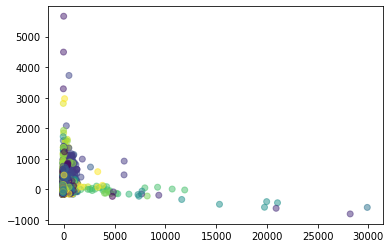

In [33]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=data1_dropped['FoodGroup'],alpha=0.5)
### จากกราฟจะเห็นได้ว่าข้อมูลนั้นส่วนใหญ่จะอยู่เป็นกระจุกกัน

**เปรียบเทียบค่าสารอาหารระหว่าง Beverages และ Snacks**

In [34]:
pr1= data1_dropped[(data1_dropped['FoodGroup']==4) | (data1_dropped['FoodGroup']==20)]  
pr1

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
2031,20,413.0,6.47,10.98,72.05,45.97,0.4,188.0,0.819,2.00,15.4,159.0,410.0,0.049,5.99,0.206,7.7,0.208889,0.481765,0.833333,0.171111,0.028000,0.3975,0.512125,0.535385,0.512500,0.341667,0.000054,0.050000,0.221429,0.140000,0.076364
2042,20,409.0,9.09,9.09,72.73,31.80,1.8,0.0,0.909,0.00,0.0,15.0,31.0,0.185,2.56,1.407,24.9,0.000000,0.534706,0.000000,0.000000,0.196000,0.0375,0.568187,0.594615,0.568333,0.025833,0.000206,0.109524,0.194286,0.452727,0.161818
4151,4,43.0,0.46,0.00,3.55,0.00,0.0,0.0,0.046,0.02,0.0,6.0,4.0,0.005,0.02,0.008,0.6,0.000000,0.027059,0.008333,0.000000,0.000000,0.0150,0.032063,0.019231,0.004167,0.003333,0.000006,0.014286,0.020000,0.010909,0.000909
4152,4,41.0,0.36,0.00,2.97,0.00,0.0,0.0,0.000,0.00,0.0,0.0,4.0,0.003,0.00,0.009,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.003333,0.000003,0.016667,0.018571,0.000000,0.000000
4153,4,28.0,0.20,0.00,0.87,0.00,0.0,0.0,0.000,0.00,0.0,0.0,4.0,0.001,0.00,0.007,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.003333,0.000001,0.014286,0.000000,0.000000,0.000909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,4,141.0,5.16,4.52,19.88,8.33,0.0,149.0,0.198,0.60,11.9,67.0,79.0,0.198,1.79,0.516,7.1,0.165556,0.116471,0.250000,0.132222,0.089333,0.1675,0.124000,0.131538,0.125833,0.065833,0.000220,0.095238,0.112857,0.129091,0.137273
8591,20,465.0,8.70,15.20,73.40,0.53,5.7,4.0,0.180,0.06,0.2,16.0,159.0,0.116,1.63,0.000,15.7,0.004444,0.105882,0.025000,0.002222,0.235333,0.0400,0.026250,0.215385,0.183333,0.132500,0.000129,0.230952,0.454286,0.285455,0.104545
8593,20,429.0,12.60,9.50,73.39,0.54,14.2,7.0,0.170,0.00,0.0,17.0,11.0,0.545,2.28,0.000,8.6,0.007778,0.100000,0.000000,0.000000,0.334000,0.0425,0.129375,0.084615,0.291667,0.009167,0.000606,0.359524,0.377143,0.156364,0.348182
8596,20,377.0,4.40,7.50,72.90,35.10,2.1,608.0,1.400,0.00,0.0,174.0,41.0,0.100,4.86,0.000,15.0,0.675556,0.823529,0.000000,0.000000,0.050667,0.4350,0.843750,0.846154,0.833333,0.034167,0.000111,0.064286,0.147143,0.272727,0.372727


In [35]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(pr1.iloc[:,1:].to_numpy())

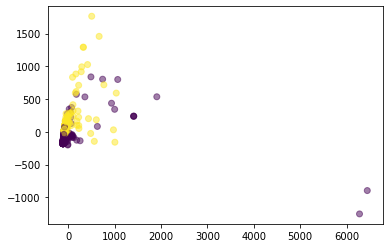

In [36]:
plt.scatter(new_pca[:,0],new_pca[:,1],c =pr1['FoodGroup'],alpha=0.5)

In [37]:
Beverages_pca=pca.transform(pr1[pr1['FoodGroup']==4].iloc[:,1:].to_numpy())
Snacks_pca=pca.transform(pr1[pr1['FoodGroup']==20].iloc[:,1:].to_numpy())

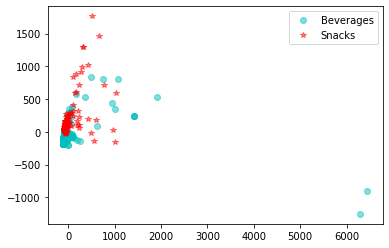

In [38]:
plt.plot(Beverages_pca[:,0],Beverages_pca[:,1],'oc',alpha=0.5,label='Beverages')
plt.plot(Snacks_pca[:,0],Snacks_pca[:,1],'*r',alpha=0.5,label='Snacks')
plt.legend()

**2 Principle Components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [39]:
pca.explained_variance_ratio_

array([0.64550466, 0.18339587])

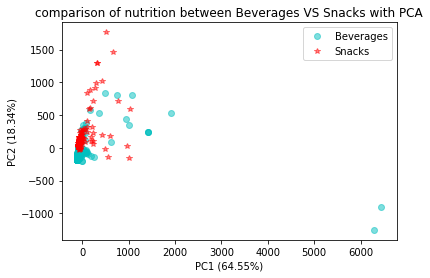

In [40]:
plt.plot(Beverages_pca[:,0],Beverages_pca[:,1],'oc',alpha=0.5,label='Beverages')
plt.plot(Snacks_pca[:,0],Snacks_pca[:,1],'*r',alpha=0.5,label='Snacks')
plt.legend()
plt.title('comparison of nutrition between Beverages VS Snacks with PCA')
plt.xlabel('PC1 (64.55%)')
plt.ylabel('PC2 (18.34%)');
###จากกราฟจะเห็นได้ว่า Beveragas และ Snacks นั้นมีข้อมูลที่ค่อนข้างจะกระจุกกันอยู่เป็นส่วนใหญ่

**ทำ PCA ใหม่**

**เนื่องจากว่า PCA1+PCA2 ไม่สามารถอธิบายข้อมูลได้ถึง 90 %**

In [41]:
pca = PCA()
new_pca1 = pca.fit_transform(pr1.iloc[:,1:].to_numpy())

In [42]:
pca.explained_variance_ratio_

array([6.45504658e-01, 1.83395871e-01, 9.42583948e-02, 5.80382772e-02,
       1.59633634e-02, 1.25238223e-03, 7.43036543e-04, 4.63767466e-04,
       1.84199047e-04, 1.12413696e-04, 4.48944226e-05, 2.61967037e-05,
       9.32173911e-06, 2.05774247e-06, 3.68475503e-07, 2.21185296e-07,
       1.86351494e-07, 1.21202224e-07, 1.10584819e-07, 7.47440596e-08,
       5.33072451e-08, 1.86706582e-08, 1.16691963e-08, 2.82561684e-33,
       2.82561684e-33, 2.82561684e-33, 2.82561684e-33, 2.82561684e-33,
       2.82561684e-33, 2.82561684e-33, 2.82561684e-33])

In [43]:
sum(pca.explained_variance_ratio_[:3])

0.923158923710338

In [44]:
pca1 = PCA(n_components=3)
new_pca2 = pca1.fit_transform(pr1.iloc[:,1:].to_numpy())

In [45]:
new_pca2

array([[ 207.88668447,  317.91102525,  -40.94403565],
       [ -84.79163558,   42.9707678 , -191.26989182],
       [-113.98235044, -155.20565266,  124.23205158],
       ...,
       [ -82.96809466,   38.10098177, -214.3506026 ],
       [ 480.38038018,  -25.05322499, -151.95146549],
       [ -98.22763266,  -39.36957708,  -96.99554594]])

In [46]:
Beverages_pca2 = pca1.transform(pr1[pr1['FoodGroup']==4].iloc[:,1:].to_numpy())
Snacks_pca2 = pca1.transform(pr1[pr1['FoodGroup']==20].iloc[:,1:].to_numpy())

In [47]:
Beverages_pca2

array([[-1.13982350e+02, -1.55205653e+02,  1.24232052e+02],
       [-1.14619531e+02, -1.59508828e+02,  1.23895464e+02],
       [-1.15346677e+02, -1.65686361e+02,  1.35432653e+02],
       [-1.14760433e+02, -1.61837989e+02,  1.36616054e+02],
       [-1.15563890e+02, -1.65827650e+02,  1.34203894e+02],
       [-1.10565063e+02, -1.21784981e+02,  4.86030479e+01],
       [-1.06405615e+02, -9.14266836e+01, -2.07363137e+00],
       [-1.15402336e+02, -1.66160544e+02,  1.36317721e+02],
       [-1.02716020e+02, -6.56853275e+01, -4.83309664e+01],
       [-6.52102122e+00, -5.84895934e+01,  1.78065432e+02],
       [-1.03449791e+02, -8.71405599e+01,  1.13488845e+01],
       [-1.00557027e+02, -1.26504281e+02,  6.55720905e+01],
       [-1.05494571e+02, -1.56833967e+02,  1.20885973e+02],
       [-1.17665235e+02, -1.78833310e+02,  1.54097522e+02],
       [-1.73985516e+01,  1.77127340e+02, -1.02814999e+02],
       [-9.59969567e+01, -7.45373155e+01,  2.83755846e+01],
       [-1.17732087e+02, -1.79355730e+02

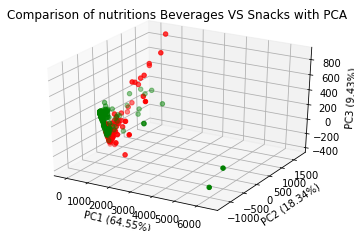

In [48]:
ax = plt.axes(projection ="3d")
ax.scatter3D(Beverages_pca2[:,0],Beverages_pca2[:,1],Beverages_pca2[:,2],c='g')
ax.scatter3D(Snacks_pca2[:,0],Snacks_pca2[:,1],Snacks_pca2[:,2],c='r')
ax.set_title('Comparison of nutritions Beverages VS Snacks with PCA')
ax.set_xlabel('PC1 (64.55%)')
ax.set_ylabel('PC2 (18.34%)')
ax.set_zlabel('PC3 (9.43%)');

**Eigen Vectors**

In [66]:
pca1.components_

array([[ 5.33808593e-02,  2.96103990e-03,  4.31570916e-04,
         1.55742007e-02,  5.19103800e-03,  8.82292252e-04,
         9.05262477e-01,  1.30267790e-03,  7.36130639e-04,
         3.04740404e-01,  8.64223326e-02,  2.77437302e-01,
         1.71244937e-04,  1.85258232e-03,  5.28778914e-03,
         3.96571374e-03,  1.00584720e-03,  7.66281120e-04,
         3.06721100e-04,  3.38600448e-03,  1.85151587e-04,
         2.16055831e-04,  8.24984522e-04,  7.83181410e-04,
         1.85457880e-04,  2.31197752e-04,  1.90272152e-07,
         1.62174841e-04,  2.04404757e-04,  7.21038862e-05,
         1.58523061e-04],
       [ 4.64667050e-01,  1.94693383e-02,  1.71713111e-02,
         6.36708738e-02,  2.52363604e-02,  6.51464676e-03,
        -2.42444041e-01,  1.04045598e-03,  4.26027327e-03,
        -1.00200779e-01,  5.54066992e-01,  6.34306582e-01,
         6.02834954e-04,  7.73959099e-03,  1.20256224e-02,
         1.69897724e-02, -2.69382268e-04,  6.12032928e-04,
         1.77511386e-03, -1.11

In [67]:
import numpy as np

In [68]:
np.argmax(pca1.components_[0,:])

6

### การวิเคราะห์ข้อมูลจาก Pizza.csv

In [49]:
import pandas as pd

In [50]:
data=pd.read_csv('Pizza.csv')
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**ตรวจสอบขนาดของข้อมูล เพื่อดูว่ามี Data กี่ตัว และ มีกี่ Dimensions**

In [51]:
data.shape

(300, 9)

**Plot Scatter Matrix เพื่อดูการกระจายของ Data ในมุมมองต่าง ๆ**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d077023d0>,
      dtype=object)

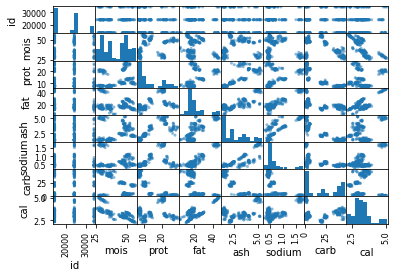

In [52]:
pd.plotting.scatter_matrix(data)

**เนื่องจาก Data นั้นมี Dimension มากเกินไป ดังนั้นจึงต้องทำการทดสอบเพื่อดูว่า Column ใดบ้างที่มีข้อมูลซ้ำ Column อื่น แล้วลบมันลบออก**

**โดยเลือกเฉพาะข้อมูลที่เป็นตัวเลขเท่านั้นมาทำต่อ**

In [53]:
newdata=data.iloc[:,1:]
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


**ตรวจสอบว่าระหว่าง Columns นั้นมี Correlation กันมากน้อยเพียงใด ด้วย Numpy**

In [54]:
import numpy as np

In [55]:
corr=np.corrcoef(newdata.to_numpy().T)

In [56]:
corr.shape

(8, 8)

In [57]:
corr

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

In [58]:
print(corr)

[[ 1.          0.03259505 -0.07648546 -0.00486006 -0.03407156 -0.01515608
   0.01496614 -0.02120862]
 [ 0.03259505  1.          0.36024768 -0.17131821  0.26555552 -0.1022789
  -0.59180165 -0.76444054]
 [-0.07648546  0.36024768  1.          0.49800167  0.8238437   0.42912952
  -0.85354226  0.0702581 ]
 [-0.00486006 -0.17131821  0.49800167  1.          0.79163396  0.93332522
  -0.64023817  0.7645671 ]
 [-0.03407156  0.26555552  0.8238437   0.79163396  1.          0.80812215
  -0.89898837  0.32646845]
 [-0.01515608 -0.1022789   0.42912952  0.93332522  0.80812215  1.
  -0.62017634  0.6719575 ]
 [ 0.01496614 -0.59180165 -0.85354226 -0.64023817 -0.89898837 -0.62017634
   1.         -0.02348458]
 [-0.02120862 -0.76444054  0.0702581   0.7645671   0.32646845  0.6719575
  -0.02348458  1.        ]]


**ทำการวนลูปเพื่อหาค่า Correlation ที่ซ้ำกัน**

In [59]:
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (i !=j) and (corr[i,j]==1.): 
     print(f' row = {i} column = {j} corrcoef = {corr[i,j]}')
     ###จากการทำการวนลูปนั้น พบว่า ไม่มี Correlation ที่ซ้ำกัน ดังนั้นจึงไม่จำเป็นที่จะต้องตัดข้อมูลใดออก

In [60]:
from matplotlib import pyplot as plt

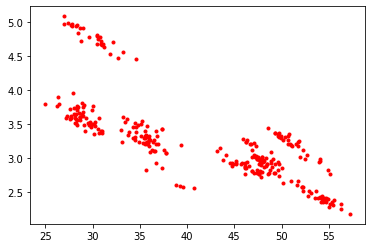

In [71]:
plt.plot(newdata.iloc[:,1],newdata.iloc[:,7],'r.')

**ทำการลบ Column ที่มีค่า Correlation เป็น 1 เมื่อเทียบกับ Column อื่น**

In [82]:
data_dropped=data.drop(['id'],axis=1)
data_dropped

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [83]:
data_dropped1=data.drop(['id','brand'],axis=1)
data_dropped1

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [84]:
from matplotlib import pyplot as plt

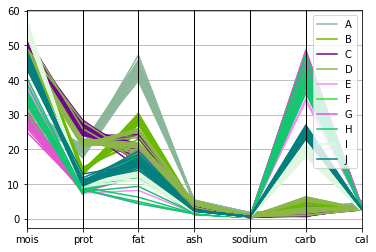

In [87]:
pd.plotting.parallel_coordinates(data_dropped,'brand')

**ทำ PCA เพื่อลดจำนวน Dimemsion** 

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)

In [90]:
new_pca=pca.fit_transform(data_drop.to_numpy())

In [91]:
new_pca.shape

(300, 2)

In [92]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

**ดูว่ามี Brand อะไรบ้าง**

In [99]:
BR=set (data['brand'])
BR

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

**ทำการสร้าง Dictionary เพื่อแทนค่า Text ให้เป็นตัวเลข**

**โดยทำการสร้าง Color List**

In [105]:
### Color List แบบนี้จะไม่ทำให้ลำดับมีการเปลี่ยนแปลง
BR_l=list(BR) 
BR_l.sort() 
color_list = {}
num = 0
for each_fg in BR_l:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [106]:
color_list

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

**แทนค่า Text ใน Dictionary ด้วยตัวเลขที่กำหนด**

In [114]:
data1_dropped=data_dropped.replace(color_list)

In [115]:
data1_dropped

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**Plot กราฟ Scatter**

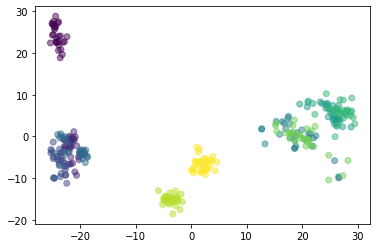

In [116]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=data1_dropped['brand'],alpha=0.5)
### จากกราฟจะเห็นได้ว่าแต่ละ brand นั้นจะอยู่กระจายกัน แต่ก็มีบางข้อมูลที่อยู่กระจุกรวมกัน

**เปรียบเทียบค่าสารอาหาร E และ H**

In [117]:
pr1= data1_dropped[(data1_dropped['brand']==4) | (data1_dropped['brand']==7)]  
pr1

,brand,mois,prot,fat,ash,sodium,carb,cal
119,4,34.58,7.44,16.24,1.31,0.39,40.43,3.38
120,4,36.84,7.77,17.07,1.37,0.40,36.95,3.33
121,4,35.14,8.05,15.77,1.38,0.41,39.66,3.33
122,4,39.25,8.67,4.44,1.54,0.51,46.10,2.59
123,4,34.51,7.75,14.87,1.42,0.42,41.45,3.31
...,...,...,...,...,...,...,...,...
234,7,36.32,8.06,12.54,1.35,0.43,41.73,3.12
235,7,34.61,7.17,17.88,1.29,0.40,39.05,3.46
236,7,36.67,7.81,9.34,1.64,0.44,44.54,2.93
237,7,35.94,7.97,13.50,1.45,0.42,41.14,3.18


In [118]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(pr1.iloc[:,1:].to_numpy())

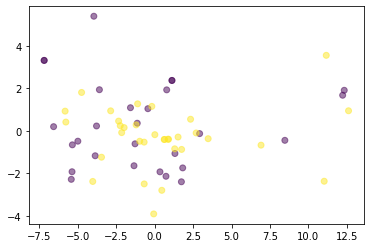

In [120]:
plt.scatter(new_pca[:,0],new_pca[:,1],c =pr1['brand'],alpha=0.5)

In [122]:
E_pca=pca.transform(pr1[pr1['brand']==4].iloc[:,1:].to_numpy())
H_pca=pca.transform(pr1[pr1['brand']==7].iloc[:,1:].to_numpy())

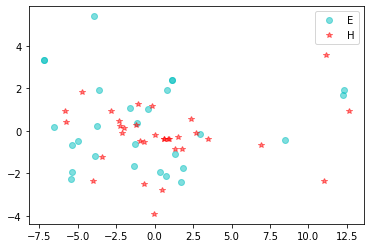

In [123]:
plt.plot(E_pca[:,0],E_pca[:,1],'oc',alpha=0.5,label='E')
plt.plot(H_pca[:,0],H_pca[:,1],'*r',alpha=0.5,label='H')
plt.legend()
### จากกราฟจะเห็นได้ว่า E และ H นั้นมีข้อมูลที่กระจายกันอยู่

**2 Principle Components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [124]:
pca.explained_variance_ratio_

array([0.87814966, 0.11650823])

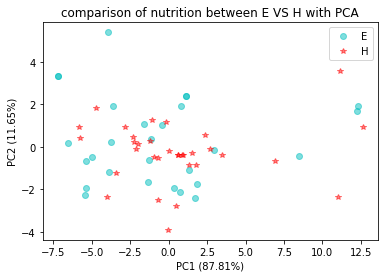

In [125]:
plt.plot(E_pca[:,0],E_pca[:,1],'oc',alpha=0.5,label='E')
plt.plot(H_pca[:,0],H_pca[:,1],'*r',alpha=0.5,label='H')
plt.legend()
plt.title('comparison of nutrition between E VS H with PCA')
plt.xlabel('PC1 (87.81%)')
plt.ylabel('PC2 (11.65%)');

**Eigen Vectors**

In [126]:
pca.components_

array([[ 0.16847644,  0.05579336, -0.79974142,  0.00380497,  0.0019914 ,
         0.5715805 , -0.04683736],
       [ 0.76800906,  0.05215285, -0.25026136,  0.01553246,  0.00406923,
        -0.58534157, -0.04391871]])

In [127]:
import numpy as np

In [128]:
np.argmax(pca.components_[0,:])

5